# <span style='font-family:Inter Black'> Regression Coefficients Distribution </span>

## <span style='font-family:Inter'> Regression Refresh </span>

The theoretical linear regression of $Y$ on $X$ is the line

$x \rightarrow a^* + b^*x$ where

$$\begin{align}(a^*, b^*) = \underset{(a,b) \in \mathop{\mathbb{R}}^2}{\arg\max} \mathop{\mathbb{E}}[(Y − a − bX)^2]\end{align}$$

minimizing we obtain:

$$\begin{align} a^* = \mathbb E[Y] - \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)} \mathbb E[X], \qquad b^* = \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)} \end{align}$$

In **empirical linear regression**, we are given a collection of points ${(x_i, y_i) }_{i=1}^{n}$. The goal is to fit a linear model $Y=a+bX+\epsilon$ by computing the Least Squares Estimator, which minimizes the loss function

$$\begin{align} \frac{1}{n} \sum_{i=1}^ n (y_i - (a + bx_i))^2. \end{align}$$

Using the same technique as in the problems on theoretical linear regression, one obtains the solution

$$\begin{align}  \hat{a} = \overline{y} - \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2} \overline{x} \qquad \hat{b} = \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2} \end{align}$$

## <span style='font-family:Inter'> Regression Coefficients Distribution </span>

### <span style='font-family:Inter'> How Student's t pops up </span>

Let $X_1, \dots X_n \sim \mathcal{N}(\mu, \sigma^2)$ iid, where both $\mu$ and $\sigma$ are unknown. We want to test that $H_0: \mu = 0$ vs $H_1: \mu \neq 0$  (in the case of regression $H_0: \beta_j = 0$ vs $H_1: \beta_j \neq 0$)

Let's compute te t statistic for hypothesis testing:

$$\begin{equation}  T_n = \sqrt{n} \frac{\overline{X_n} - \mu}{\sqrt{\tilde{S_n}}} = \frac{ \sqrt{n} \frac{\overline{X_n} - \mu}{\sigma}}{\sqrt{\frac{\tilde{S_n}}{\sigma^2}}}\end{equation} $$

Where $\tilde{S_n}$ is the sample variance. Since $\sqrt{n} \frac{\overline{X_n} - \mu}{\sigma} \sim \mathcal{N}(0, 1)$ under ($H_0$) and $\frac{\tilde{S_n}}{2} \sim \frac{\chi^2_{n-1}}{n-1}$ by **Cochran Theorem** (and, again by Cochran Theorem, the two quantities are independent. Here is a link to the [**Cochrane's Theorem Notebook**](../../Notes/StatsAndProbability/StatisticsNotes.ipynb)). These quantity falls into the definition of the [**t-student distribution**](../../Notes/StatsAndProbability/StatisticsNotes.ipynb)). Then:

$$\begin{align}T_n \sim t_{n-1}\end{align}$$

### <span style='font-family:Inter'> Apply to the regression coefficient's case</span>


[**{Stack Overflow Link}**](https://stats.stackexchange.com/questions/286179/why-is-a-t-distribution-used-for-hypothesis-testing-a-linear-regression-coeffici)

Going back to linear regression, the analytical computation of the LSE (which is also MLE) yields:

$$\begin{equation}\hat{{\boldsymbol \beta }} = (\mathbb {X}^ T \mathbb {X})^{-1} \mathbb {X}^ T \mathbf Y \end{equation}$$

And it is distributed:

$$\begin{equation}
\hat{{\boldsymbol \beta }} \sim \mathcal{N}(\beta , \sigma ^2 (\mathbb {X}^ T \mathbb {X})^{-1})
\label{betas}
\end{equation}$$

Rearranging the distribution of the regression coefficients, we get: 
    
$$\begin{equation} \frac{\widehat{\beta}_{i}-\beta_{i}}{\sigma\sqrt{(X^{T}X)^{-1}_{ii}}} \sim N(0,1) \end{equation}$$

Additionally, from the chi-squared distribution of $RSS$ we have that:
    
$$\begin{equation}
\frac{(n-p)s^{2}}{\sigma^{2}} \sim \chi^{2}_{n-p}
\end{equation}$$
    
Where $p$ is the number of parameters used in your regression and where $s^{2}=\frac{RSS}{n-p}$ is the unbiased estimator for $\sigma^2$. 

    
$$\begin{equation}
\frac{s^{2}}{\sigma^{2}} \sim \frac{\chi^{2}_{n-p}}{n-p} 
\label{rss}
\end{equation}$$

If we divide $\eqref{betas}$ by the square root of $\eqref{rss}$ we obtain:

$$
\begin{equation}
\frac{\widehat{\beta}_{i}-\beta_{i}}{s\sqrt{(X^{T}X)^{-1}_{ii}}} \sim t_{n-p}
\end{equation}
$$

## <span style='font-family:Inter'> Example </span>

Let's make an example with $10$ data points of two independent normal random variables, with an $\mathop{\mathbb{E}}[{\beta}] = 0$.

Which values can $\beta$ take?

In [16]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy.stats import t as student_t
from primitive import r_squared_distribution, distributions

In [20]:
n_samples = 50000
n_data_points = 6
k = 1
dof = n_data_points - k

In [6]:
# todo when k != 1
samples = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=(n_samples, n_data_points))

In [7]:
b1_dict = {}
b0_dict = {}
var_est = {}
se_dict = {}
for cnt, sample in enumerate(samples):
    X = sample[:,0]
    y = sample[:,1]
    X = sm.add_constant(X)
    res = sm.OLS(y, X).fit()
    b0 = res.params[0]
    b1 = res.params[1]
    b0_dict[cnt] = b0
    b1_dict[cnt] = b1
    se_dict[cnt] = res.bse[1]  # standard error of the beta coefficient
    # np.sqrt((sum((y - (X[:,1] * b1 + b0))**2)/(n-2)) / sum((X[:, 1]-np.mean(X[:, 1]))**2)) =  res.bse[1]

In [8]:
beta_dist = pd.Series(b1_dict)
beta_dist_n = beta_dist / pd.Series(se_dict)

In [9]:
threshold = -2
from scipy.stats import t as student_t
cum_prob = len(beta_dist_n[beta_dist_n < threshold]) / len(beta_dist_n)
cum_prob_theory = round(student_t.cdf(threshold, df=dof), 4)

print(cum_prob, "(data cumulative probability %s)" % str(threshold))
print(cum_prob_theory, "(theoretical cumulative probability at %s)"% str(threshold))

0.0575 (data cumulative probability -2)
0.0581 (theoretical cumulative probability at -2)


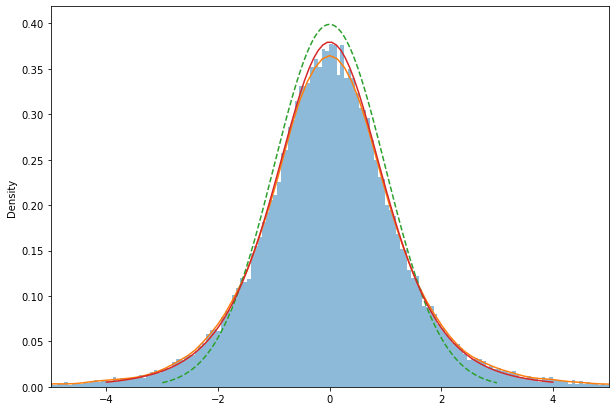

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(beta_dist_n, density=True, bins=1000, alpha=0.5)
beta_dist_n.plot.kde()

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--')

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
dist = student_t(dof, 0)
plt.plot(x, dist.pdf(x))
plt.xlim([-5, 5])
plt.show()

## <span style='font-family:Inter'> R-Squared Coefficients Distribution Code</span>

Distribution of the R-squared of independent rvs  

In [11]:
def distributions(f, **kwargs):
    return f(**kwargs) 

def r_squared_distribution(f, X_params, y_params):
    r_squared_dict = {}
    for i in np.arange(0, 10000, 1):
        df = pd.DataFrame(distributions(f, **X_params))
        s = pd.Series(distributions(f, **y_params))
        result = OLS(endog=s, exog=df).fit()
        r_squared_dict[i] = result.rsquared
    
    return pd.Series(r_squared_dict)

In [12]:
from statsmodels.regression.linear_model import OLS
n_features = 10
n_samples = 60

In [13]:
mu = 0.0
sigma = 0.001
normal_params_X = {'loc': mu, 'scale': sigma, 'size': [n_samples, n_features]}
normal_params_y = {'loc': mu, 'scale': sigma, 'size': n_samples}
rsq_s_normal = r_squared_distribution(np.random.normal, normal_params_X, normal_params_y)

In [14]:
dof = 1
tstud_params_X = {'df': dof, 'size': [n_samples, n_features]}
tstud_params_y = {'df': dof, 'size': n_samples}
rsq_s_tstud = r_squared_distribution(np.random.standard_t, tstud_params_X, tstud_params_y)

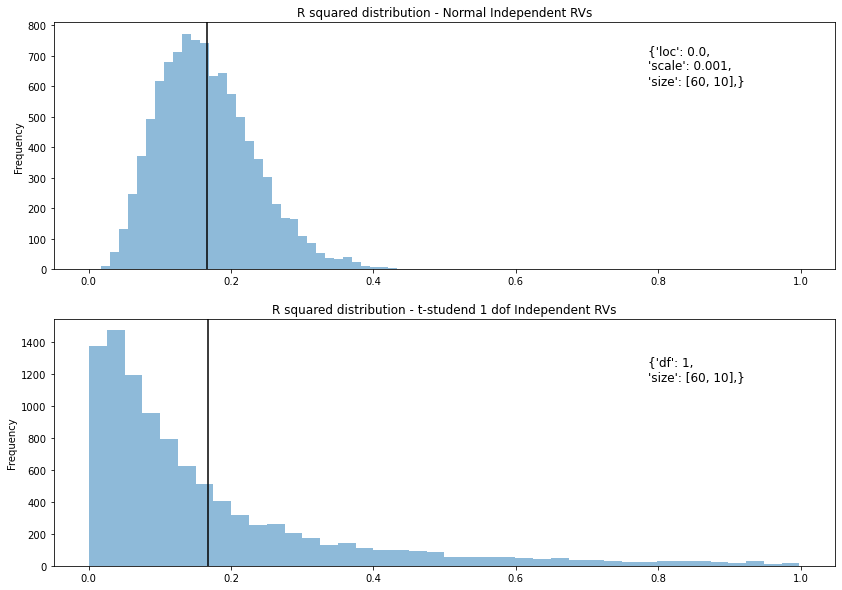

In [15]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

rsq_s_normal.plot(kind='hist', bins=40, ax=ax1, alpha=0.5)
rsq_s_tstud.plot(kind='hist', bins=40, ax=ax2, alpha=0.5)

ax1.axvline(rsq_s_normal.mean(), color='black')
ax2.axvline(rsq_s_tstud.mean(), color='black')

limits = ((min([ax1.get_xlim()[0], ax2.get_xlim()[0]])), max([ax1.get_xlim()[1], ax2.get_xlim()[1]]))
ax1.set_xlim(limits[0], limits[1])
ax2.set_xlim(limits[0], limits[1])
ax1.set_title('R squared distribution - Normal Independent RVs')
ax2.set_title('R squared distribution - t-studend {} dof Independent RVs'.format(str(dof)))

ax2.text(ax2.get_xlim()[1]*0.75, ax2.get_ylim()[1]*0.75, 
         "{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in tstud_params_X.items()) + "}", fontsize=12)

ax1.text(ax1.get_xlim()[1]*0.75, ax1.get_ylim()[1]*0.75, 
         "{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in normal_params_X.items()) + "}", fontsize=12)

plt.show()